In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
data_dir= 'datasets'
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

# Load the dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

In [5]:
# Define the classes
classes = ['Tikus', 'Kambing', 'Sapi']

# Define the model architecture
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(64 * 28 * 28, 128),
    nn.ReLU(),
    nn.Linear(128, len(classes))
)

In [6]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [15]:
# Train the model
num_epochs = 25
batch_size = 32
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
for epoch in range(num_epochs):
    running_loss = 1
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(dataset)
    print('Epoch [{}/{}], Loss: {:.8f}'.format(epoch+1, num_epochs, epoch_loss))
print('Finished Training')

Epoch [1/25], Loss: 0.33333333
Epoch [2/25], Loss: 0.33333333
Epoch [3/25], Loss: 0.33333333
Epoch [4/25], Loss: 0.33333333
Epoch [5/25], Loss: 0.33333333
Epoch [6/25], Loss: 0.33333333
Epoch [7/25], Loss: 0.33333333
Epoch [8/25], Loss: 0.33333333
Epoch [9/25], Loss: 0.33333333
Epoch [10/25], Loss: 0.33333333
Epoch [11/25], Loss: 0.33333333
Epoch [12/25], Loss: 0.33333333
Epoch [13/25], Loss: 0.33333333
Epoch [14/25], Loss: 0.33333333
Epoch [15/25], Loss: 0.33333333
Epoch [16/25], Loss: 0.33333333
Epoch [17/25], Loss: 0.33333333
Epoch [18/25], Loss: 0.33333333
Epoch [19/25], Loss: 0.33333333
Epoch [20/25], Loss: 0.33333333
Epoch [21/25], Loss: 0.33333333
Epoch [22/25], Loss: 0.33333333
Epoch [23/25], Loss: 0.33333333
Epoch [24/25], Loss: 0.33333333
Epoch [25/25], Loss: 0.33333333
Finished Training


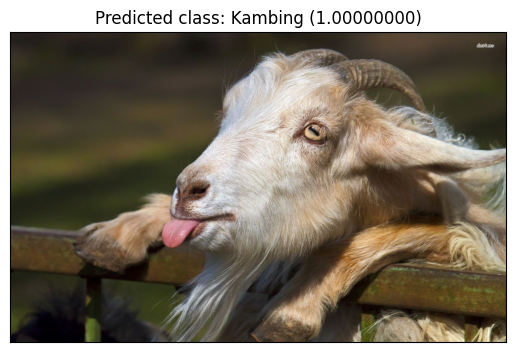

In [19]:
# Test the model
model.eval()

test_image_path = 'C:\MSIB WIDYA ROBOTICS\WEEK_02\ImageClassification\datasets\kambing\kambing.jpg'
test_image = Image.open(test_image_path)
test_image_tensor = transform(test_image)
test_image_tensor = test_image_tensor.unsqueeze(0)
with torch.no_grad():
    outputs = model(test_image_tensor)
probabilities = nn.functional.softmax(outputs[0], dim=0)
probability_list = probabilities.numpy()
predicted_class_index = np.argmax(probability_list)
predicted_class = classes[predicted_class_index]

# Show the test image, the probabilities, and the predicted class
plt.imshow(test_image)
plt.title('Predicted class: {} ({:.8f})'.format(predicted_class, probability_list[predicted_class_index]))
plt.xticks([])
plt.yticks([])
plt.show()